## Notebook 3: Feature Engineering and Transformation

### Introduction

Data preprocessing is a critical step in any data analysis pipeline. It involves transforming raw data into a format that is suitable for machine learning algorithms. This process typically includes:

- **Label Encoding**: Assigning numerical values to categorical data.
- **Data Splitting**: Dividing the dataset into training and testing sets to evaluate model performance.
- **Feature Scaling**: Normalizing or standardizing features to bring them to a similar scale.
- **Dimensionality Reduction**: Reducing the number of features while preserving as much information as possible.

In the previous notebook, we performed an exploratory data analysis to understand the data's characteristics. In this notebook, we will apply various preprocessing techniques to prepare the data for model building.

### Goal
The primary goal of this notebook is to select the most predictive features and transform the data to enhance the performance of our machine learning models.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")


plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'

data = pd.read_csv('data/clean-data.csv', index_col=False)
for col in ['Unnamed: 0', 'id']:
    if col in data.columns:
        data.drop(col, axis=1, inplace=True)
#data.head()

### 1. Label Encoding
Machine learning models require all input and output variables to be numeric. Since the `diagnosis` column is categorical (containing 'M' for malignant and 'B' for benign), we need to convert it into a numerical format. We will use `LabelEncoder` from scikit-learn to transform the class labels into integers.

In [2]:
#Assign predictors to a variable of ndarray (matrix) type
array = data.values
X = array[:,1:31]
y = array[:,0]

In [ ]:
#transform the class labels from their original string representation (M and B) into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Call the transform method of LabelEncorder on two dummy variables
le.transform (['M', 'B'])

After encoding the class labels, malignant tumors are represented as `1` (presence of cancer) and benign tumors as `0` (absence of cancer). This numerical representation is suitable for use in our machine learning models.

### 2. Data Splitting
To evaluate the performance of our models, we need to split the dataset into a training set and a testing set.

- **Training Set**: Used to train the machine learning models.
- **Testing Set**: Used to evaluate the performance of the trained models on unseen data.

We will use a 75/25 split, where 75% of the data is used for training and 25% for testing. This is a common practice in machine learning to ensure that the model is evaluated on data it has not been trained on.

In [4]:
from sklearn.model_selection import train_test_split

##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

### 3. Feature Standardization
Standardization is a preprocessing technique that transforms attributes to have a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when features are on the same scale.

As observed in the previous notebook, the features in our dataset have different distributions and scales. By standardizing the data, we ensure that all features contribute equally to the model's training process.

In [5]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

/Users/sheeroh/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### 4. Dimensionality Reduction using PCA
Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform a large set of variables into a smaller one that still contains most of the information. It is particularly useful when dealing with high-dimensional data where features are correlated.

From the pair plots in the previous notebook, we observed that many feature pairs effectively separate the data. PCA will help us combine these features into a smaller set of principal components, making the data easier to work with while retaining as much information as possible.

From the pair plot in 02_Statistical_Analysis_and_Visualization.ipynb, lot of feature pairs divide nicely the data to a similar extent, therefore, it makes sense to use one of the dimensionality reduction methods to try to use as many features as possible and maintian as much information as possible when working with only 2 dimensions. I will use PCA

In [ ]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)

# summarize components
print("Explained Variance:", fit.explained_variance_ratio_)
print(fit.components_)

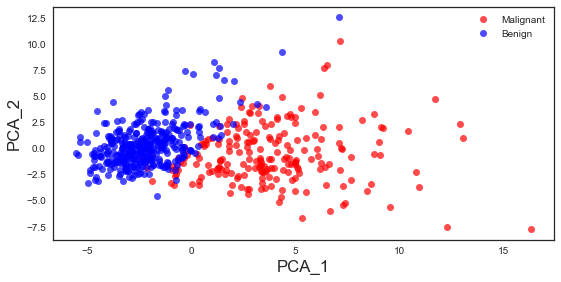

In [7]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][data.diagnosis == 'M'],PCA_df['PCA_2'][data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.diagnosis == 'B'],PCA_df['PCA_2'][data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

Now, what we got after applying the linear PCA transformation is a lower dimensional subspace (from 3D to 2D in this case), where the samples are “most spread” along the new feature axes.



In [ ]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)

## Deciding How Many Principal Components to Retain

In order to decide how many principal components should be retained, it is common to summarise the results of a principal components analysis by making a scree plot. More about scree plot can be found [here](http://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html), and [hear](https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/) 

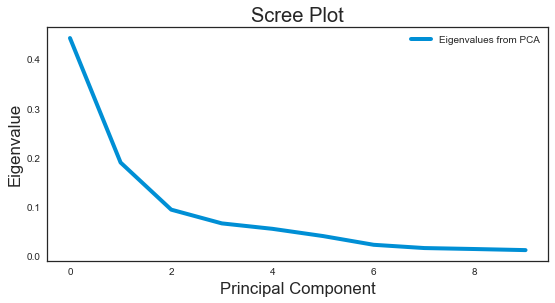

In [9]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)

plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

> #### Observation
The most obvious change in slope in the scree plot occurs at component 2, which is the “elbow” of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.

### A Summary of the Data Preprocing Approach used here:

1. assign features to a NumPy array X, and transform the class labels from their original string representation (M and B) into integers
2. Split data into training and test sets
3. Standardize the data.
4. Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix
5. Sort eigenvalues in descending order and choose the kk eigenvectors that correspond to the kk largest eigenvalues where k is the number of dimensions of the new feature subspace (k≤dk≤d).
6. Construct the projection matrix W from the selected k eigenvectors.
7. Transform the original dataset X via W to obtain a k-dimensional feature subspace Y.


It is common to select a subset of features that have the largest correlation with the class labels. The effect of feature selection must be assessed within a complete modeling pipeline in order to give you an unbiased estimated of your model's true performance. Hence, in the next section you will first be introduced to cross-validation, before applying the PCA-based feature selection strategy in the model building pipeline.
